# Objective :
applying TSNE on :<br><br>
1.BOW<br>
2.TF_IDF<br>
3.Average WORD2VEC<br>
4.TF_IDF WORD2VEC<br>

In [48]:
import sqlite3 as s
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Establishing connection and selecting all the data from reviews

In [4]:
con=s.connect("database.sqlite")

data=pd.read_sql_query("select * from Reviews",con)

In [5]:
data.shape

(568454, 10)

In [6]:
#function to change the score to positive/negative
def change(x):
    if x<3:
        return 'negative'
    else:
        return 'positive'

In [7]:
#changing the score(calling the change function)
a_s=data.Score
a_s=a_s.map(change)
data.Score=a_s
data.Score.head(10)

0    positive
1    negative
2    positive
3    negative
4    positive
5    positive
6    positive
7    positive
8    positive
9    positive
Name: Score, dtype: object

# Data cleaning
<br>It is needed to remove some unwanted things in the dataset,such as duplicates.

In [8]:
#sorting the values by product ids
data=data.sort_values("ProductId")

In [9]:
f=data[data.HelpfulnessNumerator<=data.HelpfulnessDenominator]
f.shape

(568452, 10)

In [10]:
#removing the duplicates from the data
final_data=f.drop_duplicates(subset={"UserId","Text","ProfileName","Time"},keep="first",inplace=False)

In [11]:
#selecting positive and negative review data
p_data=final_data[final_data.Score=="positive"]
n_data=final_data[final_data.Score=="negative"]

In [12]:
print(p_data.shape)
print(n_data.shape)

(336824, 10)
(57107, 10)


In [13]:
#selecting 2000 points each
p_data=p_data.head(2000)
n_data=n_data.head(2000)

In [14]:
#concatenating the positive and negative data 
d=pd.concat((p_data,n_data))
print(d.shape)

(4000, 10)


In [15]:
d.Score.value_counts()

positive    2000
negative    2000
Name: Score, dtype: int64

# Data preprocessing
<br>Here the data is made ready to work on it.
<br>removing html tags and puctuations

In [16]:
#finding html tags
import re
i=0
for s in d.Text.values:
    if (len(re.findall("<.*?>",s))):
        print(i)
        print(s)
    i+=1
        

0
In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.
9
This is a wonderful little book. I loved it 40 years ago and my twins love it now. They enjoy helping me finish each month by singing "... chicken soup with rice!"<br /><br />The cute drawings add to the fun -- but be warned, one of them is very un-PC! We're not in 1962 any more, Toto.
10
One of my earliest memories is of this book.  My mother, who read to us constantly, read this one to us, and we quoted it non-stop.  In fa

2402
Few things I'd like to point out:<p>1.  &quot;Espresso&quot; is not a roast.  It's a drink.  In northern Italy they make espresso from Vienna roast, in southern Italy they use French.  Starbucks appears to be using French roast, so they should just label it French roast like any normal person would.<p>2.  The product description says &quot;Taste Espresso Roast as both a shot of espresso and brewed in a coffee press. This is one versatile coffee!&quot;  This is patently absurd.  It's pre-ground coffee, and it's either for use in espresso machines or presses, but not both.  Here's why:<p>Making a shot of espresso requires a very fine grind.  Making coffee press coffee requires a very course grind.  If you have ground coffee that is appropriate for espresso machines, it will pass through the filter in a coffee press and you will have a cup of sludge.  If you use ground coffee that does not pass through a press's filter in an espresso machine, you do not get espresso.  You get cafe cr

In [17]:
import string 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [18]:
#stopwords
stop_words=set(stopwords.words("english"))
#initializing snowball stemmer
sno=SnowballStemmer("english")

In [19]:
#function to remove html tags
def cleanhtml(s):
    cleanr=re.compile("<.*?>")
    cleant=re.sub(cleanr," ",s)
    return cleant

In [20]:
#funtion to remove punctuation and special character
def cleanpunc(s): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',s)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [21]:
i=0
final=[]
p=[]
n=[]
for s in d.Text.values:
    f=[]
    c=cleanhtml(s)
    for w in cleanpunc(c).split():
        if w.isalpha() and len(w)>2:
            if w not in stop_words:
                sne=(sno.stem(w.lower())).encode('utf-8')
                f.append(sne)
                if (d.Score.values)[i]=="positive":
                    p.append(sne)
                if (d.Score.values)[i]=="negative":
                    n.append(sne)
            else:
                continue
        else:
            continue
    te=b" ".join(f)
    final.append(te)
    i+=1
    
                

In [22]:
#adding the preprocessed data into another column
d["cleaned"]=final

In [23]:
#checking if column was added
d

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,b'june saw charm group rose begin droop pep ch...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'this fun way children learn month year learn...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...,b'get movi sound track sing along carol king t...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,b'entertain rhyme catchi the illustr imagin fi...
150502,150503,0006641040,A3R5XMPFU8YZ4D,"Her Royal Motherliness ""Nana""",1,1,positive,1233964800,so fun to read,This is my grand daughter's and my favorite bo...,b'this grand daughter favorit book read she lo...
150501,150502,0006641040,AVFMJ50HNO21J,Jane Doe,1,1,positive,1324944000,"Tiny little book, Wonderful little rhymes.",This copy is smaller than I expected (mostly b...,b'this copi smaller expect most didnt pay atte...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...
150498,150499,0006641040,A3E7R866M94L0C,"L. Barker ""simienwolf""",2,2,positive,1065830400,Can't explain why,This book has been a favorite of mine since I ...,b'this book favorit mine sinc abl read one fir...
150497,150498,0006641040,A3SJWISOCP31TR,R. J. Wells,2,2,positive,1176336000,A Gem of a Book,This is a wonderful little book. I loved it 40...,b'this wonder littl book love year ago twin lo...


In [24]:
import sqlite3
conn=sqlite3.connect("future.sqlite")
c=conn.cursor()
conn.text_factory=str
d.to_sql('Reviews',conn,if_exists='replace',index=True)

we just saved the dataframe into file for any further use.

# Bag of words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
#considering both unigram and bigram
count_vect=CountVectorizer(ngram_range=(1,2))

In [26]:
bag=count_vect.fit_transform(d.cleaned)
print(bag.shape)

(4000, 136218)


In [64]:
model=TSNE(n_components=2,random_state=0)
tbag=model.fit_transform(bag.todense())

In [66]:
#vertical stacking of score
score=d.Score
new=np.vstack((tbag.T,score)).T

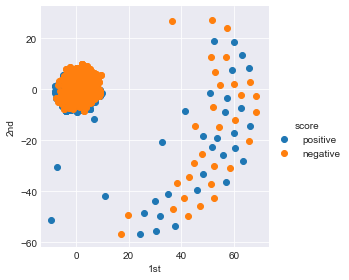

In [67]:
#coverting new to dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

This plot was with default perplexity and iterations.This plot looks overlapped but this can happen if they overlap in 3D.lets check TSNE with different values of perplexity and iterations.

In [69]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
tbag=model.fit_transform(bag.todense())

In [70]:
#vertical stacking of score
score=d.Score
new=np.vstack((tbag.T,score)).T

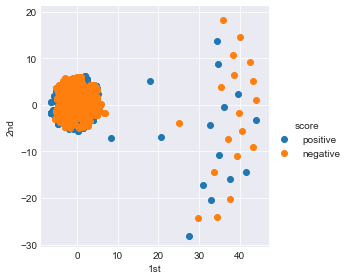

In [71]:
#coverting new to dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

This plot is with perplexity=100 and iterations =1000<br>
We are not able to differentiate it.May be in 3D it can be differentiated with plane.

In [73]:
model=TSNE(n_components=2,random_state=0,perplexity=1000,n_iter=3000)
tbag=model.fit_transform(bag.todense())

C:\Users\himateja\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [74]:
#vertical stacking of score
score=d.Score
new=np.vstack((tbag.T,score)).T

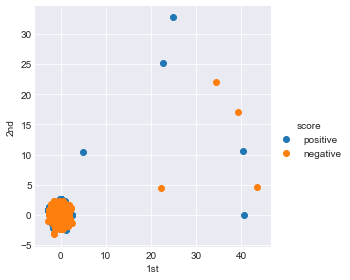

In [75]:
#coverting new to dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

This plot is with perplexity=1000 and iterations=3000.
<br>here the outliers got reduced ,but still the plot is overlapped.

In [76]:
model=TSNE(n_components=2,random_state=0,perplexity=4000,n_iter=1000)
tbag=model.fit_transform(bag.todense())

C:\Users\himateja\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [77]:
#vertical stacking of score
score=d.Score
new=np.vstack((tbag.T,score)).T

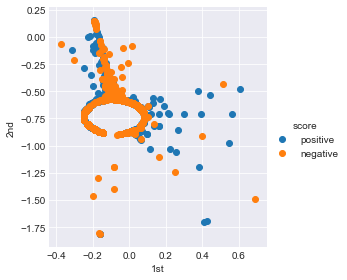

In [78]:
#coverting new to dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

This plot is with interesting perplexity of 4000 (we have 4000 datapoints),iterations=1000.
<br>When we use all datapoints the graphs becomes unsensible ,so we should not use all the points.

# tfidf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf=TfidfVectorizer(ngram_range=(1,2))

In [29]:
tfdata=tfidf.fit_transform(d.cleaned)

In [86]:
model=TSNE(n_components=2,random_state=0)
tf=model.fit_transform(tfdata.todense())

In [87]:
score=d.Score
new=np.vstack((tf.T,score)).T

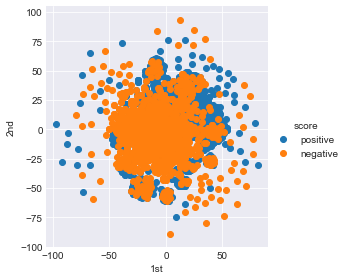

In [89]:
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

This plot is with default perplexity and iterations
<br>The plot is overlapped , may be this can be separated by a plane in 3D

In [90]:
model=TSNE(n_components=2,random_state=0,perplexity=1000,n_iter=1000)
tf=model.fit_transform(tfdata.todense())

In [91]:
score=d.Score
new=np.vstack((tf.T,score)).T

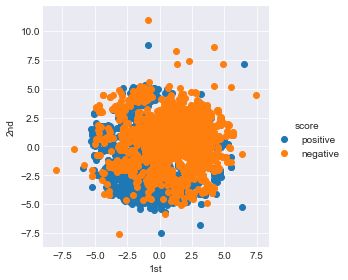

In [92]:
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

This plot is with perplexity =1000 and iterations =1000.
<br>this plot is also overlapped,but this seems to be better than the above plot as it has less outliers.

In [94]:
model=TSNE(n_components=2,random_state=0,perplexity=2000,n_iter=500)
tf=model.fit_transform(tfdata.todense())

In [ ]:
score=d.Score
new=np.vstack((tf.T,score)).T

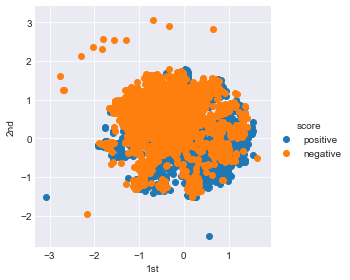

In [97]:
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

This plot is with perplexity=2000 and iterations=500
<br>This plots seems to be better than previous as it has less outliers and mostly outliers are "negative".

In [101]:
model=TSNE(n_components=2,random_state=0,perplexity=3500,n_iter=2000)
tf=model.fit_transform(tfdata.todense())

In [102]:
score=d.Score
new=np.vstack((tf.T,score)).T

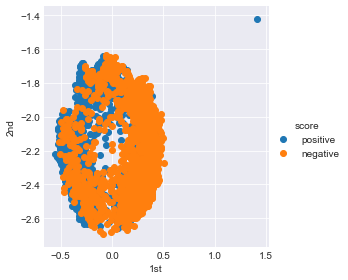

In [103]:
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

This plot is with perplexity=3500 and iterations=2000
<br>This one has only one outlier,this plot may be separated by plane in 3D

# Word2Vec

In [32]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore")

In [33]:
#making list of sentences
import string
i=0
list_s=[]
for s in d.Text.values:
    filtered=[]
    s=cleanhtml(s)
    for w in s.split():
        for c_w in cleanpunc(w).split():
            if c_w.isalpha():
                filtered.append(c_w.lower())
            else:
                continue
    list_s.append(filtered)
#training our own model
w2v_model=Word2Vec(list_s,min_count=5,size=50,workers=4)
    

In [34]:
print(w2v_model)

print(len(w2v_model.wv.vocab))

Word2Vec(vocab=4419, size=50, alpha=0.025)
4419


In [35]:
w2v_model.wv.most_similar("delicious")

[('positive', 0.9945021867752075),
 ('durable', 0.9935411214828491),
 ('powerful', 0.990723729133606),
 ('safe', 0.990662693977356),
 ('perhaps', 0.9896670579910278),
 ('extremely', 0.9890426993370056),
 ('certain', 0.9881437420845032),
 ('vegan', 0.9876738786697388),
 ('sweetened', 0.9873123168945312),
 ('hazelnut', 0.9872627258300781)]

In [36]:
w2v_model.wv.similarity("delicious","yummy")

0.9849248

# Average word2vec

In [130]:
#creating avg word2vec
sv=[]
for s in list_s:
    sum=np.zeros(50)
    i=0
    for w in s:
        try:
            
            x=w2v_model.wv[w]
            sum+=x
            i+=1
        except:
            pass
    sum/=i
    sv.append(sum)
    
#cheking the dimension
print(len(sv))
print(len(sv[0]))
        

4000
50


In [131]:
model=TSNE(n_components=2,random_state=0)
ww=model.fit_transform(np.asarray(sv))

In [132]:
score=d.Score
new=np.vstack((ww.T,score)).T

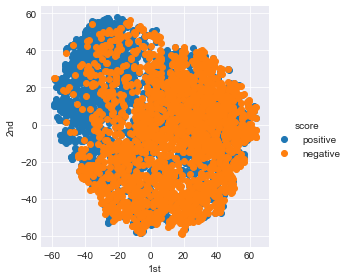

In [133]:
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [135]:
model=TSNE(n_components=2,random_state=0,perplexity=500,n_iter=500)
ww=model.fit_transform(np.asarray(sv))

In [136]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

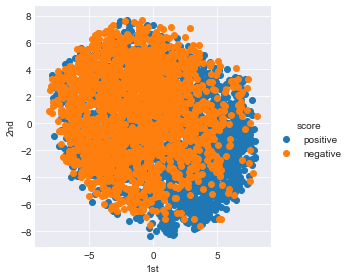

In [137]:
#plotting dataframe with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [138]:
model=TSNE(n_components=2,random_state=0,perplexity=1000,n_iter=2000)
ww=model.fit_transform(np.asarray(sv))

In [139]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

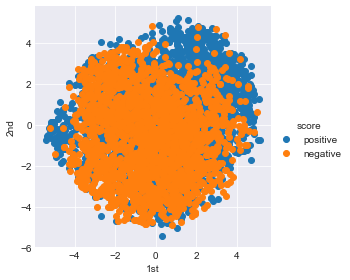

In [140]:
#plotting dataframe with seaform
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [141]:
model=TSNE(n_components=2,random_state=0,perplexity=3500,n_iter=5000)
ww=model.fit_transform(np.asarray(sv))

In [142]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

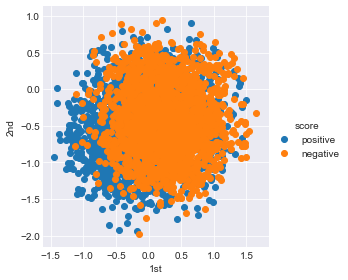

In [143]:
#creating dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

All the plots in avg word2vec are similar,they are overlapped .
<br>These plots may be differentiated by a plane in 3D.(probably)

# Tf-idf Word2Vec

In [37]:
tfidf_feat = tfidf.get_feature_names()
tf=tfidf.fit_transform(d.Text.values)
tfidfsv = []
row=0;
for s in list_s: 
    sum = np.zeros(50) 
    i=0; 
    for word in s: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = tfdata[row, tfidf_feat.index(word)]
            sum += (vec * tf_idf)
            i += tf_idf
        except:
            pass
    sum /= i
    tfidfsv.append(sum)
    row += 1

In [38]:
model=TSNE(n_components=2,random_state=0)
ww=model.fit_transform(np.asarray(tfidfsv))

In [39]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

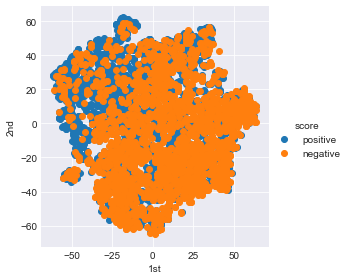

In [40]:
#creating dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [41]:
model=TSNE(n_components=2,random_state=0,perplexity=1500,n_iter=1000)
ww=model.fit_transform(np.asarray(tfidfsv))

In [42]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

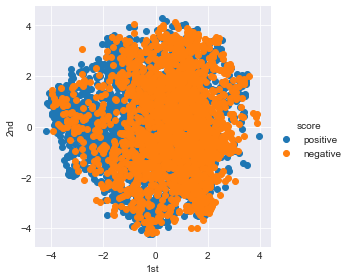

In [43]:
#creating dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

In [44]:
model=TSNE(n_components=2,random_state=0,perplexity=2000,n_iter=500)
ww=model.fit_transform(np.asarray(tfidfsv))

In [45]:
#vertical stacking
score=d.Score
new=np.vstack((ww.T,score)).T

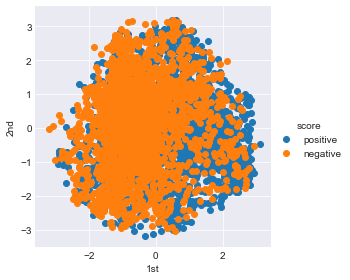

In [46]:
#creating dataframe and plotting with seaborn
df=pd.DataFrame(new,columns=['1st','2nd','score'])
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="score",size=4).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

Tfidf word2vec also seems to similar they are overlapping.
It is not possible to differentiate in 2D,we need to differentiate it in > 2D.